In [149]:
import yfinance as yf
import datetime as dt 
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import math
from scipy.stats import norm 

class VolSurface:
    def __init__(self, symbol):
        self.symbol = symbol
        self.ticker = yf.Ticker(symbol)
        self.exps = list(self.ticker.options)
        self.spot_date = dt.datetime.now().date()
        self.spot = self.ticker.fast_info['last_price']
        self.Ts = [(dt.datetime.strptime(exp, '%Y-%m-%d').date() - self.spot_date).days / 365 for exp in self.exps]

    def get_option_chain(self, date):
        return self.ticker.option_chain(date=date)
    
    def get_fwd_var(V0, V1, T0, T1): 
        pass
    
    def __call__(self, exp, strike):
        pass
 

def bs_fwd_pricer(is_call, K, F, T, sigma): 
    """Simple bs pricer with forward"""
    ds = np.maximum(1e-6, sigma * np.sqrt(T))
    dsig = 0.5 * ds **2
    d2 = (np.log(F/K) - dsig) / ds 
    d1 = d2 + ds

    if is_call: 
        return F * norm.cdf(d1) - K*norm.cdf(d2)
    else: 
        return K*norm.cdf(-d2) - F * norm.cdf(-d1)
    
def price_fwd(spot, T, r, q): 
    pass

def bs_pricer(is_call, S, K, T, r, q, sigma):
    F = price_fwd(S, T, r, q)
    


In [150]:
df = yf.Ticker('^SPX').option_chain(date='2026-03-02').calls.dropna()
df['strike_pct'] = df['strike'] / yf.Ticker('^SPX').fast_info['last_price']

In [152]:
aapl_vol = VolSurface('AAPL')

In [153]:
aapl_vol.spot

264.3500061035156

In [154]:
aapl_vol.Ts[20], aapl_vol.exps[20]

(1.9232876712328768, '2028-01-21')

In [155]:
aapl_vol.exps

['2026-02-20',
 '2026-02-23',
 '2026-02-25',
 '2026-02-27',
 '2026-03-06',
 '2026-03-13',
 '2026-03-20',
 '2026-03-27',
 '2026-04-02',
 '2026-04-17',
 '2026-05-15',
 '2026-06-18',
 '2026-07-17',
 '2026-08-21',
 '2026-09-18',
 '2026-11-20',
 '2026-12-18',
 '2027-01-15',
 '2027-06-17',
 '2027-12-17',
 '2028-01-21',
 '2028-03-17',
 '2028-12-15']

In [156]:
aapl_mar_option = aapl_vol.get_option_chain('2026-03-06').calls.dropna()
aapl_mar_option = aapl_mar_option.loc[aapl_mar_option['volume'] >= 5.]

In [158]:
aapl_mar_option_p = aapl_vol.get_option_chain('2026-03-06').puts.dropna()
aapl_mar_option_p = aapl_mar_option_p.loc[aapl_mar_option_p['volume'] >= 5.]

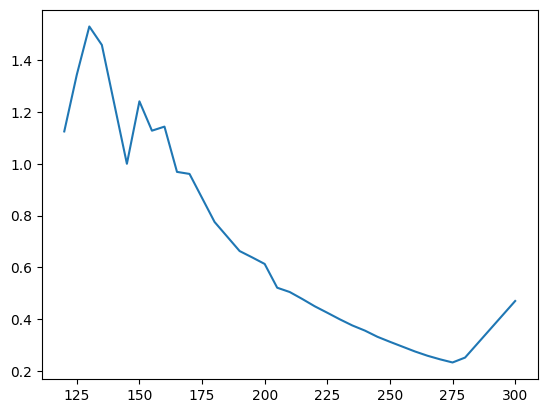

In [159]:
plt.plot(aapl_mar_option_p['strike'], aapl_mar_option_p['impliedVolatility'])

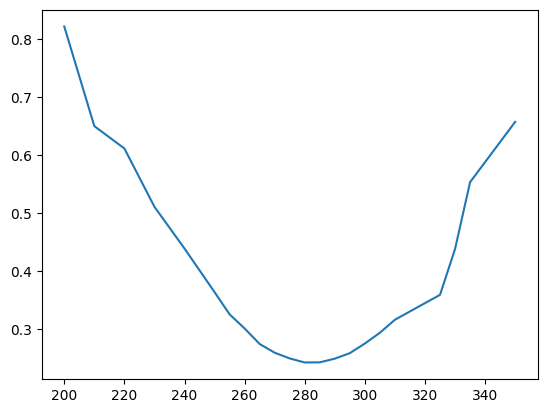

In [157]:
plt.plot(aapl_mar_option['strike'], aapl_mar_option['impliedVolatility'])

In [ ]:
def bs_simple_pricer(is_call, K, S, q, r, T, sigma): 
    """Simple pricer with dividend"""
    df = np.exp(-r * T)
    qf = np.exp(-q * T)
    


In [110]:
def get_implied_fwd(F, is_call, K, T, sigma, price): 
    return bs_fwd_pricer(is_call, K, F, T, sigma) - price

In [123]:
from scipy.optimize import fsolve

is_call, K, T, sigma, price = True, 7000, 0.0821917808219178, 0.147998, (105.80	+106.90)/2
fsolve(get_implied_fwd, K, args = (is_call, K, T, sigma, price))

array([6975.33946548])

In [136]:
is_call, K, T, sigma, price = True, aapl_mar_option['strike'], 0.0821917808219178, aapl_mar_option['impliedVolatility'], (aapl_mar_option['bid'] + aapl_mar_option['ask'])/2
fsolve(get_implied_fwd, K, args = (is_call, K, T, sigma, price))

array([6787.11704322, 6787.1622642 , 6786.74415242, 6786.37308919,
       6786.3830286 , 6786.86622971, 6786.51791198, 6786.44255999,
       6785.74732116, 6785.32120392, 6785.81632059, 6785.25204243,
       6785.67093606, 6785.26001622, 6784.22680442, 6784.47157322,
       6784.12431199, 6783.34370383, 6783.73652629, 6783.06347582,
       6782.60285689, 6783.00588399, 6781.29828318, 6782.26005582,
       6779.01175806, 6777.95846573, 6775.98939837, 6776.92764754,
       6772.86264693, 6771.67560586, 6771.10688655, 6768.1949962 ,
       6765.25823654, 6759.59060964, 6755.62985413, 6751.70327942,
       6733.37602793])

In [52]:
dt.datetime.now().date()

datetime.date(2026, 2, 1)

In [ ]:
bs_fwd_pricer(True, 6920, )

In [63]:
(yf.Ticker('^SPX').option_chain(date='2026-02-12').underlying['bid']+ yf.Ticker('^SPX').option_chain(date='2026-02-12').underlying['ask'])/2

6929.764999999999

In [21]:
def get_yahoo_finance_data(ticker: str):
        """
        Use Yahoo Finance via yfinance library (most reliable free source)
        """
        try:
            
            
            stock = yf.Ticker(ticker)
            
            # Get current price
            hist = stock.history(period="1d")
            if hist.empty:
                raise ValueError("No price data available")
            
            current_price = hist['Close'].iloc[-1]
            
            # Get options chain
            expirations = stock.options
            if not expirations:
                raise ValueError("No options data available")
            
            # Get nearest expiration
            nearest_exp = expirations[0]
            opt_chain = stock.option_chain(nearest_exp)
            
            # Format calls
            calls = []
            for _, row in opt_chain.calls.iterrows():
                calls.append({
                    'strike': float(row['strike']),
                    'bid': float(row.get('bid', 0)),
                    'ask': float(row.get('ask', 0)),
                    'last': float(row.get('lastPrice', 0)),
                    'impliedVolatility': float(row.get('impliedVolatility', 0))
                })
            
            # Format puts
            puts = []
            for _, row in opt_chain.puts.iterrows():
                puts.append({
                    'strike': float(row['strike']),
                    'bid': float(row.get('bid', 0)),
                    'ask': float(row.get('ask', 0)),
                    'last': float(row.get('lastPrice', 0)),
                    'impliedVolatility': float(row.get('impliedVolatility', 0))
                })
            
            return {
                'ticker': ticker,
                'current_price': float(current_price),
                'expiration': nearest_exp,
                'expirations': list(expirations),
                'calls': calls,
                'puts': puts
            }
            
        except Exception as e:
            raise ValueError(f"Yahoo Finance error: {str(e)}")

In [98]:
# Deribit option data

In [104]:
import websocket
import json
ws = websocket.create_connection("wss://www.deribit.com/ws/api/v2")


In [105]:
msg = {
    "jsonrpc": "2.0",
    "id": 1,
    "method": "public/get_instruments",
    "params": {
        "currency": "BTC",
        "kind": "option",
        "expired": False
    }
}

ws.send(json.dumps(msg))
response = json.loads(ws.recv())

instruments = response["result"]
print(instruments[0])

{'state': 'open', 'price_index': 'btc_usd', 'kind': 'option', 'instrument_type': 'reversed', 'maker_commission': 0.0003, 'taker_commission': 0.0003, 'instrument_name': 'BTC-3FEB26-70000-C', 'expiration_timestamp': 1770105600000, 'creation_timestamp': 1769882268000, 'is_active': True, 'tick_size': 0.0001, 'contract_size': 1.0, 'strike': 70000.0, 'instrument_id': 582525, 'min_trade_amount': 0.1, 'option_type': 'call', 'block_trade_commission': 0.0003, 'block_trade_min_trade_amount': 25, 'block_trade_tick_size': 0.0001, 'settlement_currency': 'BTC', 'settlement_period': 'day', 'base_currency': 'BTC', 'counter_currency': 'USD', 'quote_currency': 'BTC', 'tick_size_steps': [{'tick_size': 0.0005, 'above_price': 0.005}]}


In [106]:
instruments[0]['instrument_name']

'BTC-3FEB26-70000-C'

In [107]:
instrument_name = instruments[0]['instrument_name']

msg = {
    "jsonrpc": "2.0",
    "id": 2,
    "method": "public/ticker",
    "params": {
        "instrument_name": instrument_name
    }
}

ws.send(json.dumps(msg))
ticker = json.loads(ws.recv())["result"]
print(ticker)

{'timestamp': 1770092239655, 'state': 'open', 'stats': {'high': 0.1095, 'low': 0.086, 'price_change': 27.3256, 'volume': 3.1, 'volume_usd': 25222.12}, 'greeks': {'delta': 1.0, 'gamma': 0.0, 'vega': 5e-05, 'theta': -0.003, 'rho': 0.29699}, 'settlement_price': 0.0871283, 'index_price': 78591.94, 'instrument_name': 'BTC-3FEB26-70000-C', 'last_price': 0.1095, 'min_price': 0.0725, 'max_price': 0.1435, 'open_interest': 6.3, 'mark_price': 0.1093, 'best_ask_price': 0.1105, 'best_bid_price': 0.1085, 'interest_rate': 0.0, 'mark_iv': 116.28, 'bid_iv': 0.0, 'ask_iv': 330.95, 'underlying_price': 78591.5425, 'underlying_index': 'SYN.BTC-3FEB26', 'estimated_delivery_price': 78591.94, 'best_ask_amount': 45.4, 'best_bid_amount': 2.0}


In [ ]:
# Backend - FastAPI with Market Data Integration (save as main.py)
from fastapi import FastAPI, HTTPException
from fastapi.middleware.cors import CORSMiddleware
from pydantic import BaseModel
from typing import List, Optional, Dict
import httpx
from datetime import datetime, timedelta
import asyncio
import logging
import time
from functools import lru_cache

#logging.basicConfig(level=logging.DEBUG)
logger = logging.getLogger(__name__)

app = FastAPI()

# Backend cache for option chains (ticker-expiration pairs)
option_chain_cache = {}

# CORS middleware
app.add_middleware(
    CORSMiddleware,
    allow_origins=["*"],
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
)

# ==================== DATA MODELS ====================

class Position(BaseModel):
    id: int
    type: str  # 'call' or 'put'
    action: str  # 'buy' or 'sell'
    strike: float
    quantity: int
    premium: float

class CalculateRequest(BaseModel):
    positions: List[Position]
    spot_price: float
    min_price: Optional[float] = None
    max_price: Optional[float] = None

class OptionChain(BaseModel):
    strike: float
    call_bid: float
    call_ask: float
    call_volume: int
    put_bid: float
    put_ask: float
    put_volume: int
    expiration: str

class MarketDataRequest(BaseModel):
    ticker: str
    expiration_date: Optional[str] = None  # YYYY-MM-DD format

# ==================== MARKET DATA SOURCES ====================

class MarketDataProvider:
    @staticmethod
    def get_yahoo_finance_data(ticker: str) -> Dict:
        import time
        import yfinance as yf
        
        max_retries = 3
        for attempt in range(max_retries):
            try:
                logger.info(f"Starting yfinance fetch for {ticker} (attempt {attempt + 1}/{max_retries})")
                stock = yf.Ticker(ticker)
                
                # Get current price with retry logic for None response
                logger.info(f"Fetching history for {ticker}")
                hist = stock.history(period="1d")
                
                # Check if yfinance returned None or empty
                if hist is None or hist.empty:
                    logger.warning(f"Empty response from yfinance for {ticker}, retrying...")
                    time.sleep(2 ** attempt)  # Exponential backoff
                    continue
                
                current_price = hist['Close'].iloc[-1]
                logger.info(f"Current price for {ticker}: {current_price}")
                
                # Get available expirations
                logger.info(f"Fetching expiration dates for {ticker}")
                expirations = stock.options
                if not expirations:
                    raise ValueError("No options data available")
                
                logger.info(f"Successfully fetched data for {ticker}")
                return {
                    'ticker': ticker,
                    'current_price': float(current_price),
                    'expirations': list(expirations)
                }
                
            except (TypeError, KeyError) as e:
                logger.warning(f"Malformed response for {ticker}: {str(e)}, retrying...")
                if attempt < max_retries - 1:
                    time.sleep(2 ** attempt)  # Exponential backoff
                    continue
                raise ValueError(f"Yahoo Finance returned invalid data after {max_retries} attempts: {str(e)}")
            
            except Exception as e:
                logger.error(f"Error fetching data for {ticker}: {str(e)}")
                if attempt < max_retries - 1:
                    time.sleep(2 ** attempt)  # Exponential backoff
                    continue
                raise ValueError(f"Yahoo Finance error: {str(e)}")
    
 

# ==================== API ENDPOINTS ====================

@app.post("/api/calculate-payoff")
async def calculate_payoff(request: CalculateRequest):
    """Calculate payoff diagram for given positions"""
    
    if not request.positions:
        return {'data': []}
    
    min_price = request.min_price or request.spot_price * 0.7
    max_price = request.max_price or request.spot_price * 1.3
    steps = 100
    
    result = []
    
    for i in range(steps + 1):
        price = min_price + (max_price - min_price) * (i / steps)
        total_payoff = 0
        total_cost = 0
        
        for pos in request.positions:
            # Calculate premium cost/credit
            cost = pos.premium * pos.quantity * (1 if pos.action == 'buy' else -1)
            total_cost += cost
            
            # Calculate intrinsic value at expiration
            if pos.type == 'call':
                intrinsic = max(0, price - pos.strike)
            else:  # put
                intrinsic = max(0, pos.strike - price)
            
            # Calculate position payoff
            payoff = intrinsic * pos.quantity * (1 if pos.action == 'buy' else -1)
            total_payoff += payoff
        
        result.append({
            'price': round(price, 2),
            'payoff': round(total_payoff - total_cost, 2),
            'intrinsic': round(total_payoff, 2),
            'cost': round(total_cost, 2)
        })
    
    return {'data': result}

@app.get("/api/market-data/{ticker}")
async def get_market_data(ticker: str):
    """
    Get current market data and options chain for a ticker
    """
    logger.info(f"Request received for ticker: {ticker}")
    
    try:
        ticker = ticker.upper()
        logger.info(f"Fetching data for {ticker}...")
        
        # Run yfinance in thread pool since it's blocking I/O
        loop = asyncio.get_event_loop()
        data = await loop.run_in_executor(None, MarketDataProvider.get_yahoo_finance_data, ticker)
        
        logger.info(f"Successfully fetched data for {ticker}")
        return data
        
    except Exception as e:
        logger.error(f"Error fetching market data for {ticker}: {str(e)}", exc_info=True)
        raise HTTPException(status_code=400, detail=f"Failed to fetch data for {ticker}: {str(e)}")

@app.get("/api/option-chain/{ticker}/{expiration}")
async def get_option_chain(ticker: str, expiration: str):
    """
    Get options chain for specific expiration date
    Format: YYYY-MM-DD
    Cached on backend
    """
    
    try:
        import yfinance as yf
        
        ticker = ticker.upper()
        cache_key = f"{ticker}-{expiration}"
        
        # Check backend cache
        if cache_key in option_chain_cache:
            logger.info(f"Returning cached option chain for {cache_key}")
            return option_chain_cache[cache_key]
        
        logger.info(f"Fetching option chain for {cache_key}")
        stock = yf.Ticker(ticker)
        
        # Check if expiration is valid
        if expiration not in stock.options:
            raise ValueError(f"Invalid expiration date. Available: {stock.options}")
        
        opt_chain = stock.option_chain(expiration)
        
        # Format response
        calls = []
        for _, row in opt_chain.calls.iterrows():
            calls.append({
                'strike': float(row['strike']),
                'bid': float(row.get('bid', 0)),
                'ask': float(row.get('ask', 0)),
                'last': float(row.get('lastPrice', 0)),
                'openInterest': int(row.get('openInterest', 0)),
                'impliedVolatility': float(row.get('impliedVolatility', 0))
            })
        
        puts = []
        for _, row in opt_chain.puts.iterrows():
            puts.append({
                'strike': float(row['strike']),
                'bid': float(row.get('bid', 0)),
                'ask': float(row.get('ask', 0)),
                'last': float(row.get('lastPrice', 0)),
                'openInterest': int(row.get('openInterest', 0)),
                'impliedVolatility': float(row.get('impliedVolatility', 0))
            })
        
        result = {
            'ticker': ticker,
            'expiration': expiration,
            'calls': calls,
            'puts': puts
        }
        
        # Cache the result
        option_chain_cache[cache_key] = result
        logger.info(f"Cached option chain for {cache_key}")
        
        return result
        
    except Exception as e:
        raise HTTPException(status_code=400, detail=str(e))

@app.get("/api/option-premium/{ticker}/{expiration}/{option_type}/{strike}")
async def get_interpolated_premium(ticker: str, expiration: str, option_type: str, strike: float):
    """
    Get interpolated premium for a specific strike using linear interpolation
    Uses cached option chain data
    option_type: 'call' or 'put'
    """
    try:
        import yfinance as yf
        
        ticker = ticker.upper()
        option_type = option_type.lower()
        
        if option_type not in ['call', 'put']:
            raise ValueError("option_type must be 'call' or 'put'")
        
        cache_key = f"{ticker}-{expiration}"
        
        # Check if option chain is cached
        if cache_key not in option_chain_cache:
            logger.info(f"Option chain not cached, fetching for {cache_key}")
            stock = yf.Ticker(ticker)
            
            if expiration not in stock.options:
                raise ValueError(f"Invalid expiration date")
            
            opt_chain = stock.option_chain(expiration)
            
            # Format and cache
            calls = []
            for _, row in opt_chain.calls.iterrows():
                calls.append({
                    'strike': float(row['strike']),
                    'bid': float(row.get('bid', 0)),
                    'ask': float(row.get('ask', 0))
                })
            
            puts = []
            for _, row in opt_chain.puts.iterrows():
                puts.append({
                    'strike': float(row['strike']),
                    'bid': float(row.get('bid', 0)),
                    'ask': float(row.get('ask', 0))
                })
            
            option_chain_cache[cache_key] = {
                'calls': calls,
                'puts': puts
            }
        
        cached_chain = option_chain_cache[cache_key]
        options = cached_chain['calls'] if option_type == 'call' else cached_chain['puts']
        
        # Sort by strike
        sorted_options = sorted(options, key=lambda x: x['strike'])
        strikes = [opt['strike'] for opt in sorted_options]
        mid_prices = [(opt['bid'] + opt['ask']) / 2.0 for opt in sorted_options]
        
        # Handle boundaries
        if strike <= strikes[0]:
            premium = float(mid_prices[0])
        elif strike >= strikes[-1]:
            premium = float(mid_prices[-1])
        else:
            # Linear interpolation
            for i in range(len(strikes) - 1):
                if strikes[i] <= strike <= strikes[i + 1]:
                    ratio = (strike - strikes[i]) / (strikes[i + 1] - strikes[i])
                    premium = mid_prices[i] + ratio * (mid_prices[i + 1] - mid_prices[i])
                    break
        
        return {
            'ticker': ticker,
            'expiration': expiration,
            'strike': float(strike),
            'option_type': option_type,
            'premium': float(premium)
        }
        
    except Exception as e:
        raise HTTPException(status_code=400, detail=str(e))

@app.get("/api/analyze-strategy")
async def analyze_strategy(positions: str):
    """
    Analyze a strategy and return Greeks, probabilities, etc.
    This is a placeholder for future implementation
    """
    return {
        'message': 'Strategy analysis coming soon',
        'features': [
            'Greeks calculation (Delta, Gamma, Theta, Vega)',
            'Probability of profit',
            'Risk metrics',
            'Margin requirements'
        ]
    }

@app.get("/api/health")
async def health():
    return {
        'status': 'healthy',
        'data_sources': {
            'yahoo_finance': 'available (no API key needed)',
            'alpha_vantage': 'available (requires API key)',
            'polygon': 'available (requires API key)'
        }
    }

# ==================== UTILITY FUNCTIONS ====================

def calculate_greeks(position: Position, spot_price: float, volatility: float, 
                     risk_free_rate: float = 0.05, days_to_expiry: int = 30):
    """
    Calculate option Greeks using Black-Scholes model
    This is a simplified implementation
    """
    from math import log, sqrt, exp
    from scipy.stats import norm
    
    S = spot_price
    K = position.strike
    T = days_to_expiry / 365.0
    r = risk_free_rate
    sigma = volatility
    
    d1 = (log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * sqrt(T))
    d2 = d1 - sigma * sqrt(T)
    
    if position.type == 'call':
        delta = norm.cdf(d1)
        gamma = norm.pdf(d1) / (S * sigma * sqrt(T))
        theta = (-S * norm.pdf(d1) * sigma / (2 * sqrt(T)) 
                 - r * K * exp(-r * T) * norm.cdf(d2)) / 365
        vega = S * norm.pdf(d1) * sqrt(T) / 100
    else:  # put
        delta = -norm.cdf(-d1)
        gamma = norm.pdf(d1) / (S * sigma * sqrt(T))
        theta = (-S * norm.pdf(d1) * sigma / (2 * sqrt(T)) 
                 + r * K * exp(-r * T) * norm.cdf(-d2)) / 365
        vega = S * norm.pdf(d1) * sqrt(T) / 100
    
    return {
        'delta': delta,
        'gamma': gamma,
        'theta': theta,
        'vega': vega
    }

if __name__ == "__main__":
    import uvicorn
    uvicorn.run(app, host="0.0.0.0", port=8000)